In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps

In [3]:
#sleep analysis based on life habits

In [4]:
df = pd.read_csv("health_and_sleep_analysys.csv")

In [5]:
df.shape

(374, 13)

In [6]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
#filling Nan values with None str
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None") 

In [12]:
#droping not important columns

In [13]:
df = df[[#'Person ID', 
        'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', #'Blood Pressure', 
    'Heart Rate', 'Daily Steps',
       'Sleep Disorder']]

In [11]:
#####distributions vizualization######

In [12]:
#distribtions of numeric features

In [13]:
df_num_cols = df.select_dtypes(["number"]).columns.tolist()

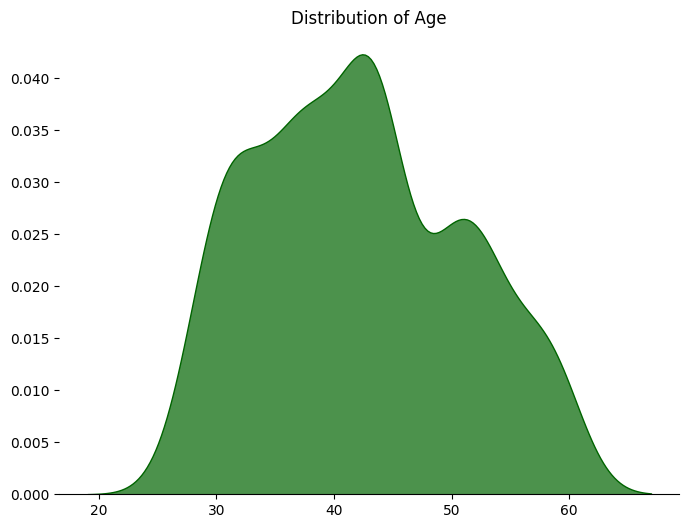

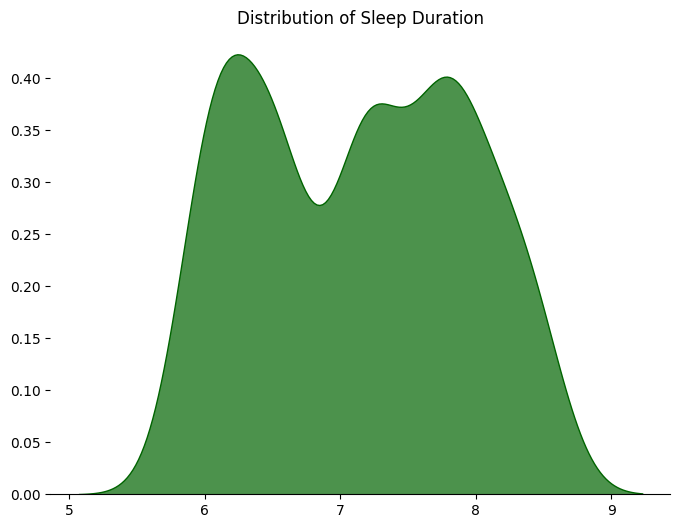

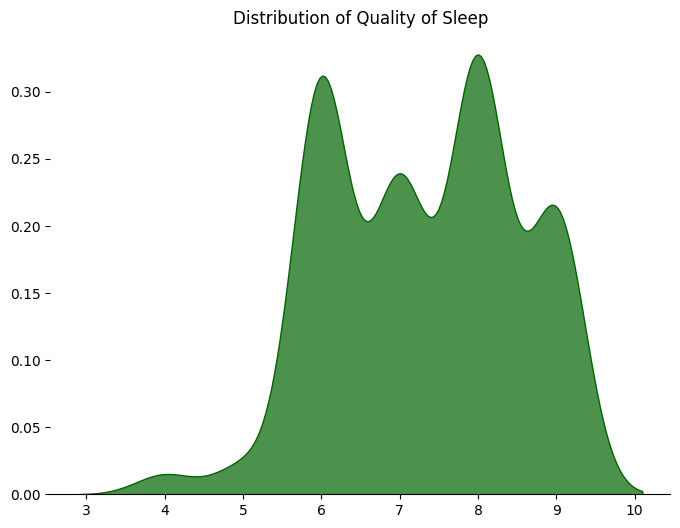

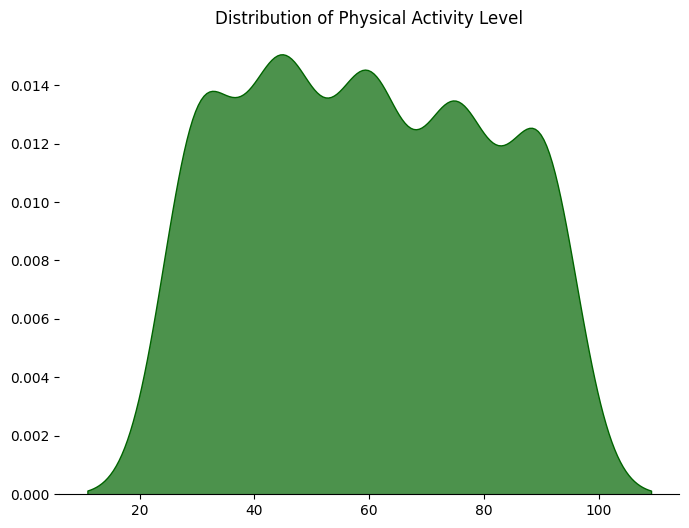

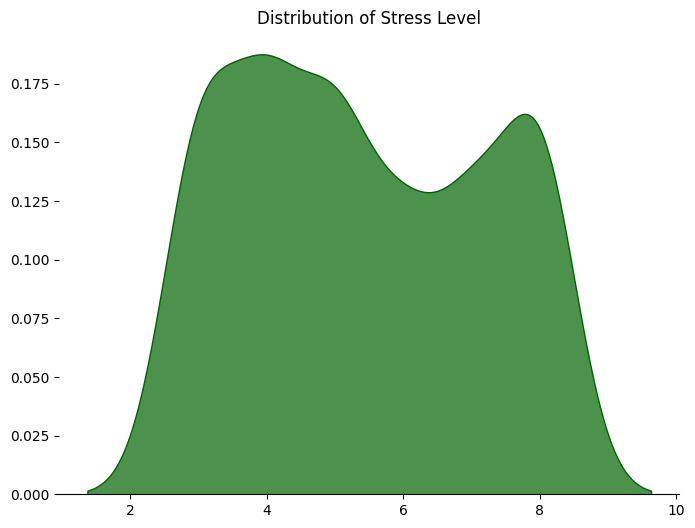

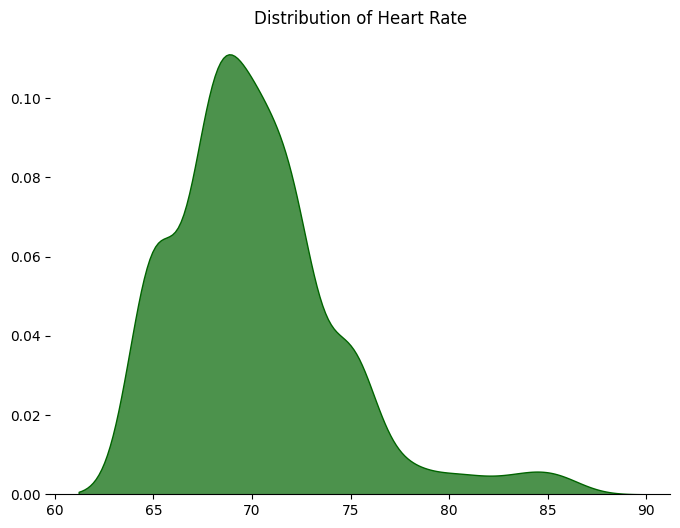

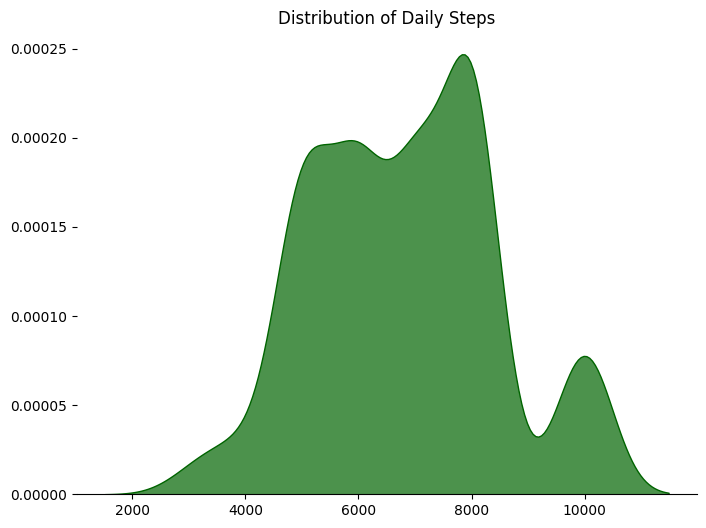

In [16]:
for i in df_num_cols:
    plt.figure(figsize = (8, 6))
    sns.kdeplot(df[i], color = "darkgreen", fill = "darkgreen", alpha = 0.7)
    plt.title(f'Distribution of {i}')
    plt.xlabel(None)
    plt.ylabel(None)
    sns.despine(top = True, right = True, left = True)
    plt.show()

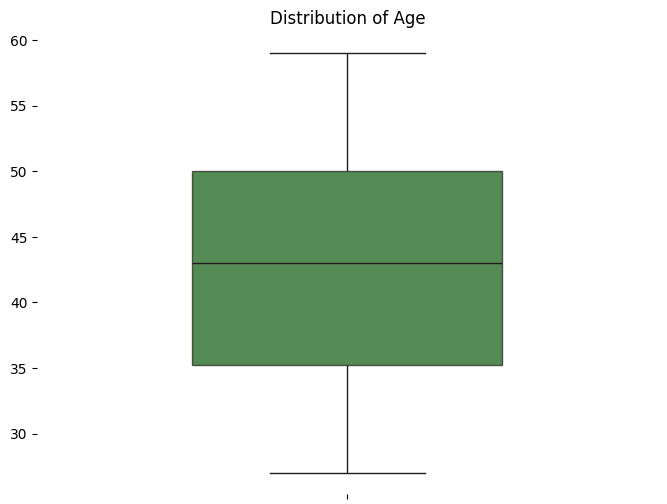

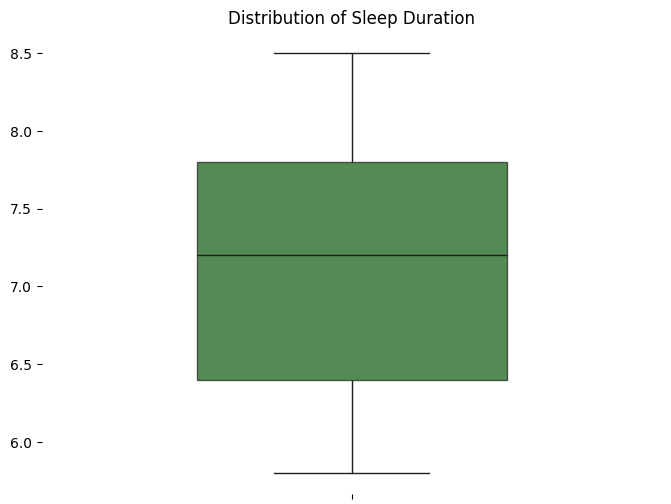

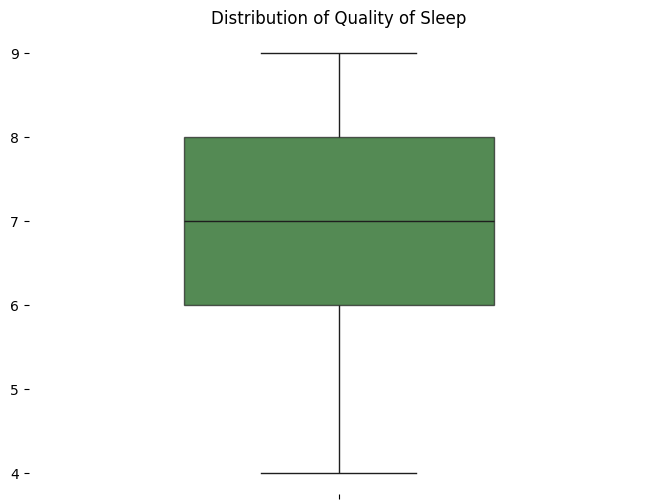

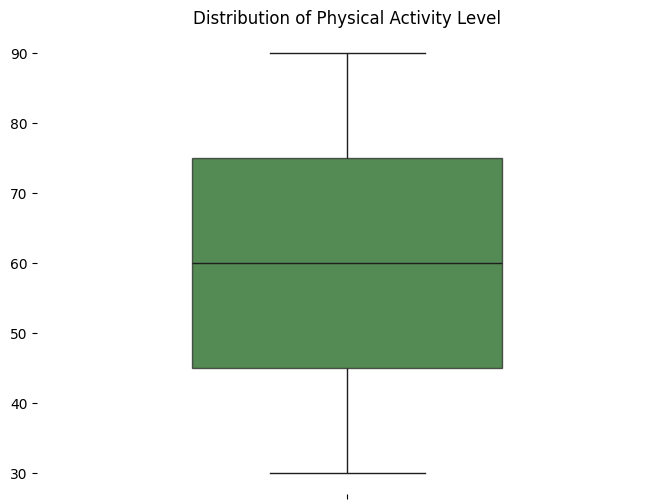

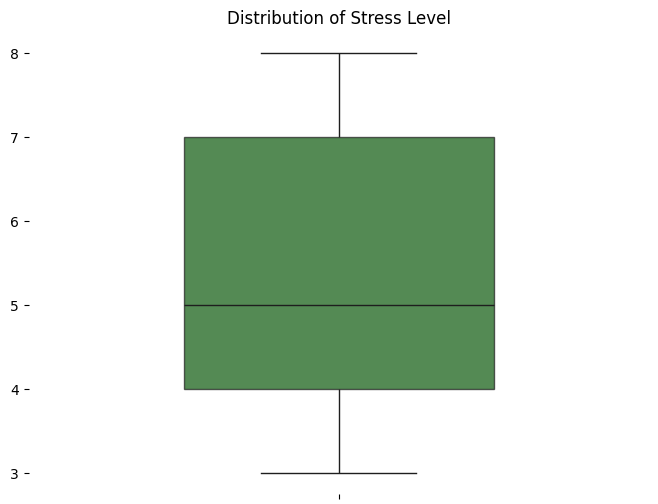

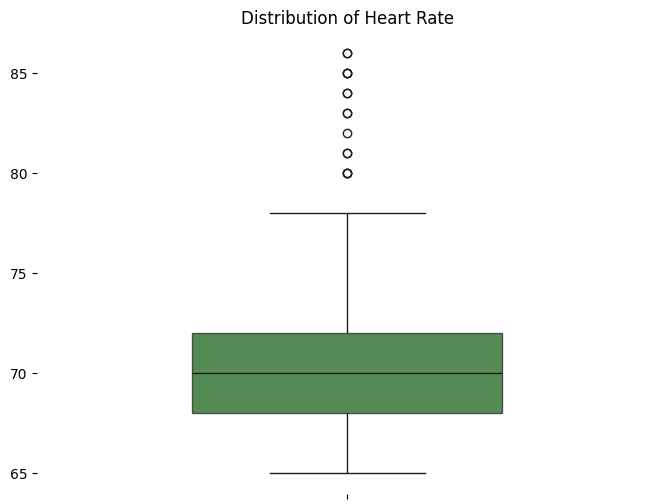

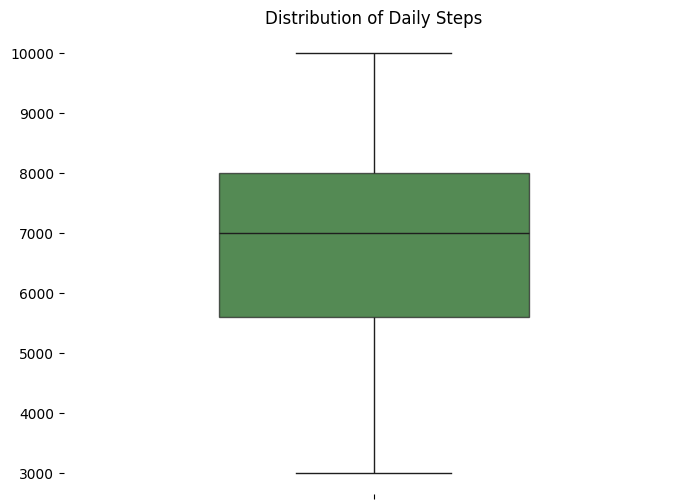

In [17]:
for i in df_num_cols:
    plt.figure(figsize = (8, 6))
    sns.boxplot(df[i], color = "darkgreen", width = 0.5, boxprops = dict(alpha = 0.7))
    plt.title(f'Distribution of {i}')
    plt.xlabel(None)
    plt.ylabel(None)
    sns.despine(top = True, right = True, left = True, bottom = True)
    plt.show()

In [18]:
#distribtions of not numeric features

In [19]:
df_not_num_cols = df.select_dtypes(["object"]).columns.tolist()

In [20]:
df_not_num_cols

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

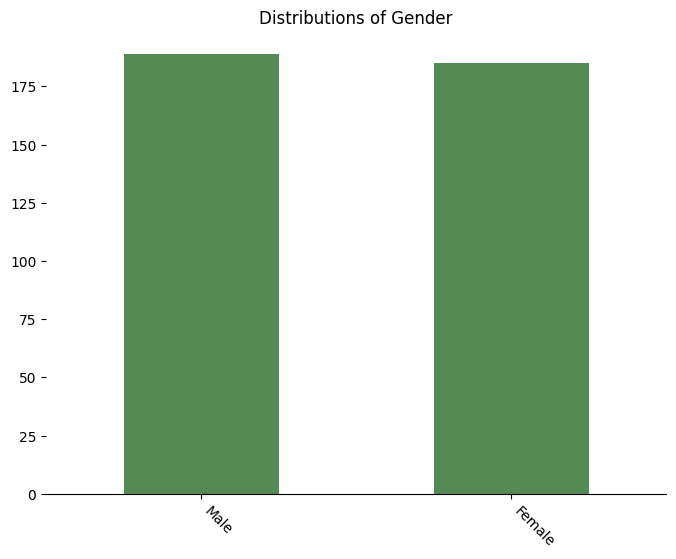

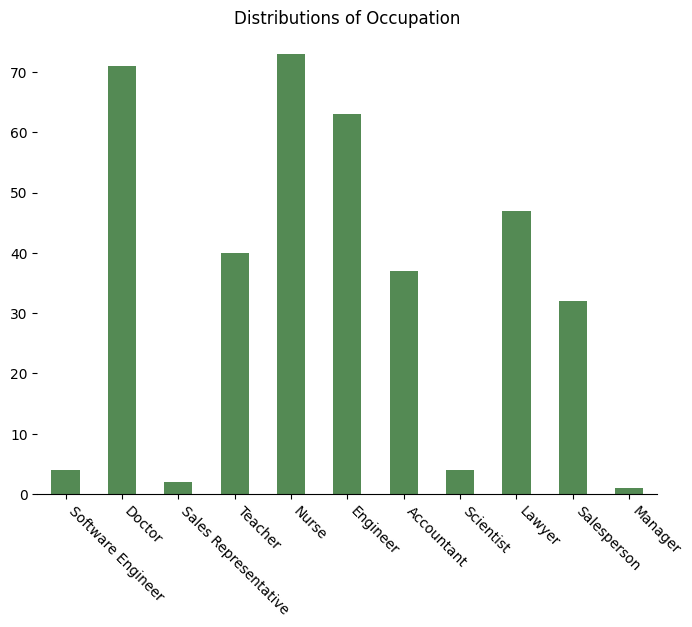

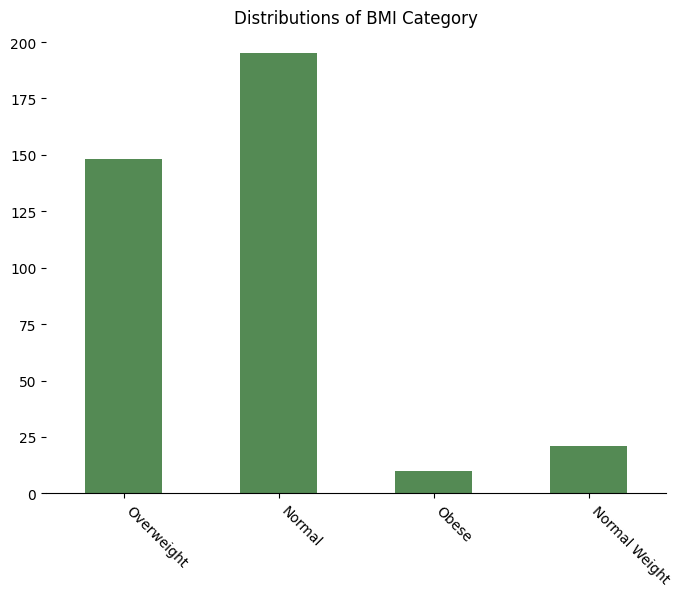

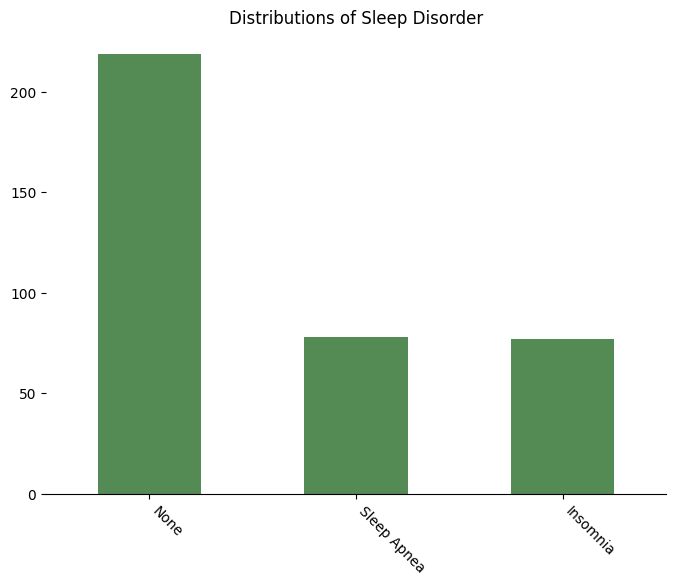

In [21]:
for i in df_not_num_cols:
    plt.figure(figsize = (8, 6))
    sns.countplot(x = df[i], color = "darkgreen", width = 0.5, alpha = 0.7)
    plt.title(f"Distributions of {i}") 
    plt.xticks(rotation = -45, ha = "left")
    plt.xlabel(None)
    plt.ylabel(None)
    sns.despine(top = True, right = True, left = True)
    plt.show()

In [22]:
#Questions

In [23]:
#1 Is there difference in Herth Rate between overweight people and people with normal bmi

In [24]:
gr1 = df[df["BMI Category"] == "Normal"]["Heart Rate"].sample(100)
gr1

159    68
1      75
126    68
175    70
26     70
       ..
13     70
56     70
316    65
207    70
129    68
Name: Heart Rate, Length: 100, dtype: int64

In [25]:
gr2 = df[df["BMI Category"] == "Overweight"]["Heart Rate"].sample(100)
gr2

254    65
367    68
231    72
223    72
290    75
       ..
189    72
259    65
348    68
177    72
224    65
Name: Heart Rate, Length: 100, dtype: int64

In [26]:
#равенство дисперсий

In [28]:
stat, p_value = sps.levene(gr1, gr2)
p_value < 0.05

np.True_

In [29]:
# дисперсии различаются

In [30]:
t_value, p_value = sps.ttest_ind(gr1, gr2, equal_var = False)
p_value < 0.05

np.True_

In [31]:
#P-value меньше уровня значимости 0.05 -> делаем вываод о том, что розличия в частоте сердцебмения между 
#людьми с лишним весом и без значимы 

In [32]:
#2 Is there differnce is sleep quality between people with low stress level(0-5) and hight stress level(6-10)

In [41]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [33]:
gr1 = df[df["Stress Level"] <= 5]["Quality of Sleep"].sample(100)
gr1

169    8
262    7
217    8
99     8
358    9
      ..
319    9
224    7
181    8
125    8
369    9
Name: Quality of Sleep, Length: 100, dtype: int64

In [34]:
gr2 = df[df["Stress Level"] > 5]["Quality of Sleep"].sample(100)
gr2

289    6
308    7
64     6
53     7
287    6
      ..
297    6
17     6
265    6
222    6
272    6
Name: Quality of Sleep, Length: 100, dtype: int64

In [36]:
stat, p_value = sps.levene(gr1, gr2)
p_value < 0.05

np.True_

In [37]:
#дисперсии одинаковы

In [38]:
t_value, p_value = sps.ttest_ind(gr1, gr2)
p_value < 0.05

np.True_

In [39]:
#P-value меньше уровня значимости 0.05 -> делаем вываод о том, что розличия в качестве сна между 
# людьми с низким уровнем стресса и высокоим являются существнными

In [40]:
#3 is there connection between age group and quality of sleep

In [83]:
#будет 2 группы по возрасту
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [41]:
df_young = df[40 >= df.Age]["Quality of Sleep"].sample(100)
df_young

124    8
107    8
73     6
22     7
137    8
      ..
37     7
30     5
28     7
45     7
20     7
Name: Quality of Sleep, Length: 100, dtype: int64

In [42]:
df_old = df[df.Age > 40]["Quality of Sleep"].sample(100)
df_old 

350    9
252    7
348    9
299    9
261    7
      ..
320    9
349    9
324    9
291    6
272    6
Name: Quality of Sleep, Length: 100, dtype: int64

In [43]:
# varinace test
stat, p_value = sps.levene(df_young, df_old)
p_value < 0.05

np.True_

In [44]:
# дисперсии разичаются, берем поправку на неравенство

stst, p_value = sps.ttest_ind(df_young, df_old, equal_var = False)
p_value < 0.05

np.True_

In [45]:
#качество сна зависиит от возраста
#как зависиит?

In [46]:
stat, p_value = sps.ttest_ind(df_young, df_old, equal_var = False, alternative = "greater")
p_value < 0.05

np.False_

In [ ]:
#вывод: качество сна в группе 40 и выше лучше, чем в группе 40 и ниже, это может обьясняться множеством разных факторов
# в том числе переработками, неправильным режимом, тяжелой учебой и стрессом

In [102]:
#4 Does physicall activity level affects sleep quality in young people (20-40)

In [47]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [49]:
prep = df[(df.Age >= 20) & (df.Age <= 40)]


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [54]:
# activity < 25
low_activity = prep[prep["Physical Activity Level"] <= 25]["Quality of Sleep"]
low_activity

Series([], Name: Quality of Sleep, dtype: int64)

In [ ]:
# таких в выборке нет

In [ ]:
# 25 < activity <= 50

In [63]:
middle_activity = prep[(prep["Physical Activity Level"] <= 50) & (prep["Physical Activity Level"] > 25)]["Quality of Sleep"]
middle_activity.size

54

In [ ]:
# 50 < activity <= 75

In [65]:
high_middle_activity = prep[(prep["Physical Activity Level"] > 50) & (prep["Physical Activity Level"] <= 75)]["Quality of Sleep"]
high_middle_activity.size

107

In [ ]:
# activity > 75

In [66]:
high_activity = prep[prep["Physical Activity Level"] > 75]["Quality of Sleep"]
high_activity.size

4

In [ ]:
# в выборке слишком мало элементов, не будем ее использовать, сравним только 2 и 3 группы

In [ ]:
# равенство дисперсий

In [69]:
stat, p_value = sps.levene(middle_activity, high_middle_activity)
p_value < 0.05

np.False_

In [ ]:
# дисперсии не отличаются

In [70]:
stat, p_value = sps.ttest_ind(middle_activity, high_middle_activity) 
p_value < 0.05

np.True_

In [ ]:
# есть значимые различия, посмотрим кто спит лучше

In [73]:
stat, p_value = sps.ttest_ind(middle_activity, high_middle_activity, alternative= "less")
p_value < 0.05

np.True_

In [ ]:
# у людей с более высоким уровнем физической актвиности качество сна выше

In [ ]:
#5 Does physical activity level affects sleep quality in older people (40-60)

In [75]:
prep = df[(df.Age >= 40) & (df.Age <= 60)]
low_activity = prep[prep["Physical Activity Level"] <= 25]["Quality of Sleep"]
middle_activity = prep[(prep["Physical Activity Level"] <= 50) & (prep["Physical Activity Level"] > 25)]["Quality of Sleep"]
high_middle_activity = prep[(prep["Physical Activity Level"] > 50) & (prep["Physical Activity Level"] <= 75)]["Quality of Sleep"]
high_activity = prep[prep["Physical Activity Level"] > 75]["Quality of Sleep"]

In [76]:
low_activity.size

0

In [77]:
middle_activity.size

101

In [78]:
high_middle_activity.size

43

In [80]:
high_activity.size

69

In [ ]:
# смотирм равенство дисперсий

In [87]:
stat, p_value = sps.levene(middle_activity, high_middle_activity, high_activity)
p_value < 0.05

np.True_

In [ ]:
# делаем вывод, что дисперсии в каких то гурпах отличаются, простроим boxplot'ы для всех групп

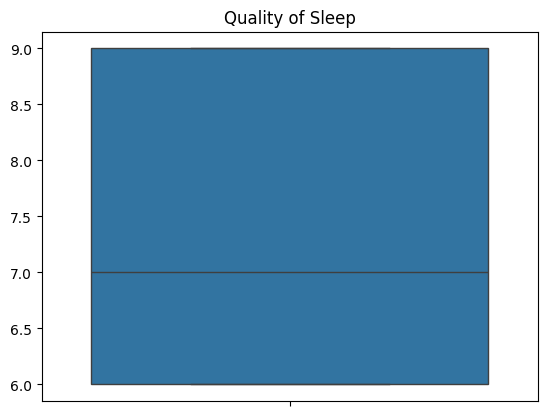

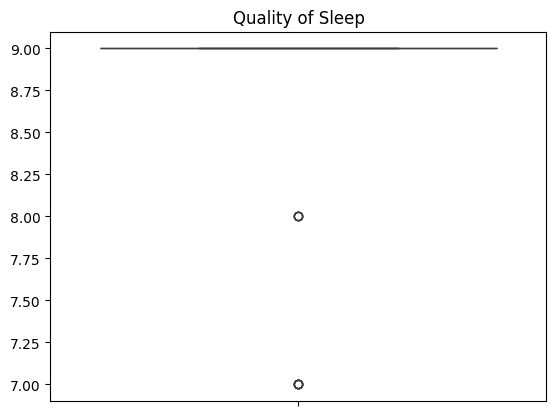

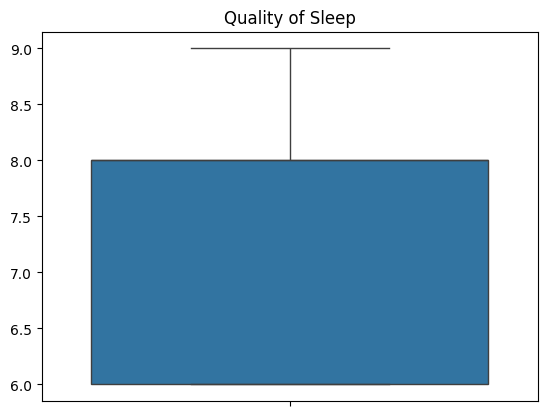

In [96]:
for i in [middle_activity, high_middle_activity, high_activity]:
    sns.boxplot(i)
    plt.title(i.name)
    plt.ylabel("") 
    plt.show()

In [ ]:
# из графиков видим, что в среднеактивной группе сильно отлчичается дисперсия

In [ ]:
# делаем t-тесты для 1 и 3 групп, и тест уэлча по другому 1 и 2 и 1 и 3, потом сохраняем p_value
# и делаем поправку Бенжамина-Холберга на множественные сравнения

In [112]:
res = []
res.append(sps.ttest_ind(middle_activity, high_middle_activity, equal_var= False)[1])
res.append(sps.ttest_ind(high_activity, high_middle_activity, equal_var= False)[1])
res.append(sps.ttest_ind(high_activity, middle_activity)[1])
res

[np.float64(4.0539570845741983e-13),
 np.float64(2.7688032558752635e-14),
 np.float64(0.396992815785153)]

In [26]:
from statsmodels.stats.multitest import multipletests

In [114]:
res_bh = multipletests(res, method = "fdr_bh")
res_bh[1]
ans = []
for i in res_bh[1]:
    ans.append(i < 0.05)
ans

[np.True_, np.True_, np.False_]

In [ ]:
#видим, что внезапно, разницы в качестве сна у сильно взрослых людей нет для средней активности и сильно высокой активнсоити, это может 
# может быть вызвано тем, что занятия споротом людей бльшого возраста могут вызывать проблемы со здовроьем,а не улучшение самочувствия

In [ ]:
#6 Is there difference in sleep quality between peoples with and without sleep disorder

In [14]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea


<Axes: xlabel='count', ylabel='Sleep Disorder'>

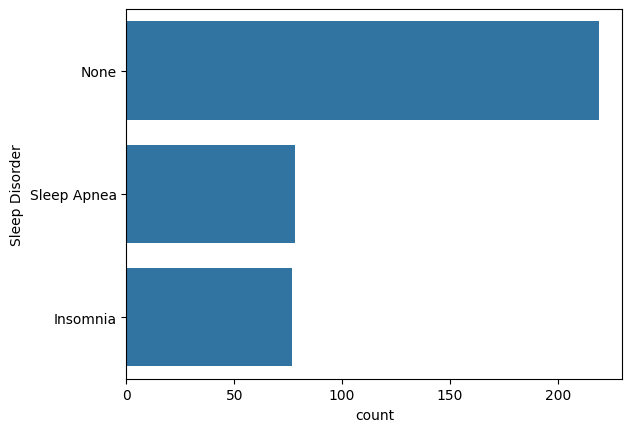

In [14]:
sns.countplot(df["Sleep Disorder"])

In [15]:
gr1 = df[df["Sleep Disorder"] == "None"]["Quality of Sleep"].sample(100)
gr1

249    6
139    8
164    8
217    8
314    9
      ..
52     6
316    9
54     6
33     6
110    8
Name: Quality of Sleep, Length: 100, dtype: int64

In [16]:
gr2 = df[df["Sleep Disorder"] == "Sleep Apnea"]["Quality of Sleep"]
gr3 = df[df["Sleep Disorder"] == "Insomnia"]["Quality of Sleep"]


In [17]:
# равенстов дисперсий

In [18]:
stat, p_value = sps.levene(gr1, gr2, gr3)
p_value < 0.05

np.True_

In [19]:
# есть разница дисперсий, построим boxplot'ы

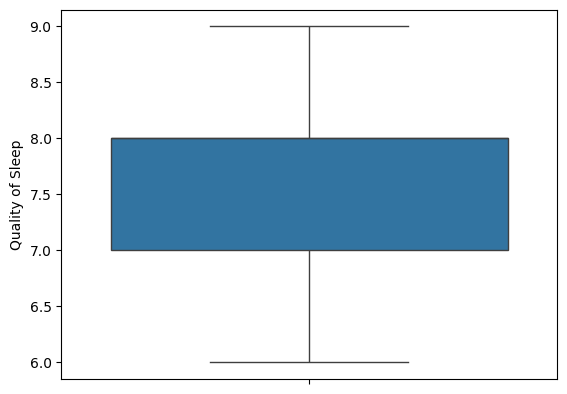

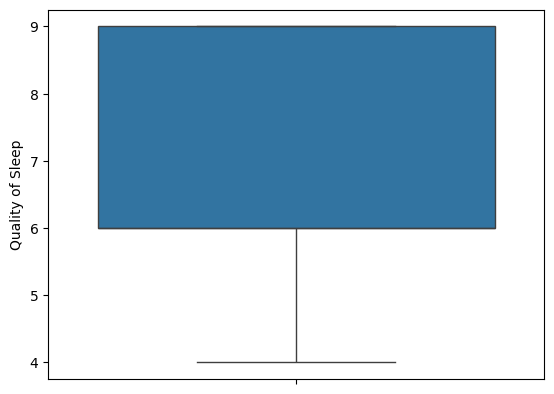

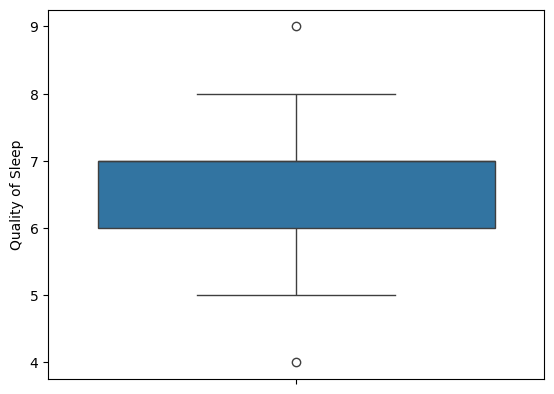

In [20]:
for i in [gr1, gr2, gr3]:
    sns.boxplot(i)
    plt.xlabel("")
    plt.show()

In [21]:
# в группе 2 отлиаются дисперсия

In [22]:
# провдеем для сравнения 1 и 2 и 1 и 3 тест уэлча вместо обычного двухвыборочного т-теста

In [23]:
values = []

values.append(sps.ttest_ind(gr1, gr2, equal_var=False)[1])
values.append(sps.ttest_ind(gr2, gr3, equal_var=False)[1])
values.append(sps.ttest_ind(gr1, gr3, equal_var=True)[1])
values

[np.float64(0.007999675125884393),
 np.float64(0.0015832863098357408),
 np.float64(1.344366727316709e-16)]

In [24]:
# поправка Бенжамина-Холберга на множественный сравнения

In [27]:
values_corrected = multipletests(values, method = "fdr_bh")

In [28]:
values_corrected

(array([ True,  True,  True]),
 array([7.99967513e-03, 2.37492946e-03, 4.03310018e-16]),
 np.float64(0.016952427508441503),
 0.016666666666666666)

In [29]:
res = []
for i in values_corrected[1]:
    res.append(i < 0.05)

res

[np.True_, np.True_, np.True_]

In [32]:
#делаем вывод, во всех трех группах качесвто сна отличается значимо

In [30]:
gr1.mean()

np.float64(7.77)

In [31]:
gr2.mean()

np.float64(7.205128205128205)

In [32]:
gr3.mean()

np.float64(6.532467532467533)